In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB 


In [2]:
# Load the dataset
data = pd.read_csv('titanic.csv')
data.head(20)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Preprocessing: Taking a close look at the missing values
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Name,0,0.0


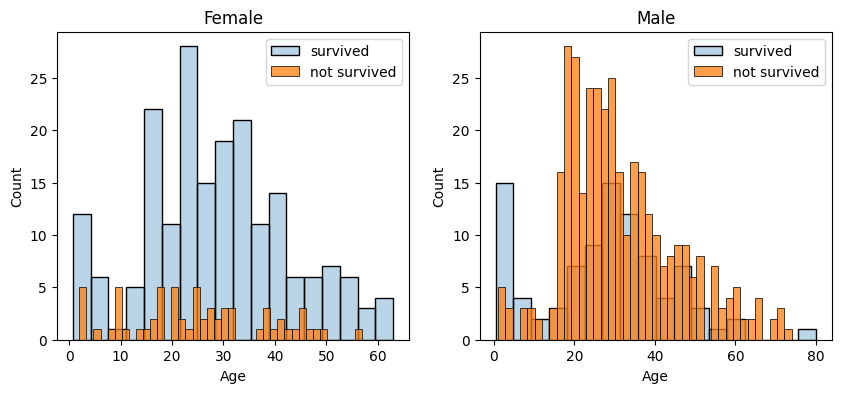

In [6]:
# Now lets explore throught the data 
# We focus on gender a little too much so we will be comparing correlations for sub classes in gender 
# lets take a look at the correlation of age with survival probability
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = data[data['Gender']=='female']
men = data[data['Gender']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False,alpha=0.3)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False,alpha=0.3)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')
# its found that different age groups in men and women have varying survival chances it is not a linear correlation 
# so we need to make classes out of age 

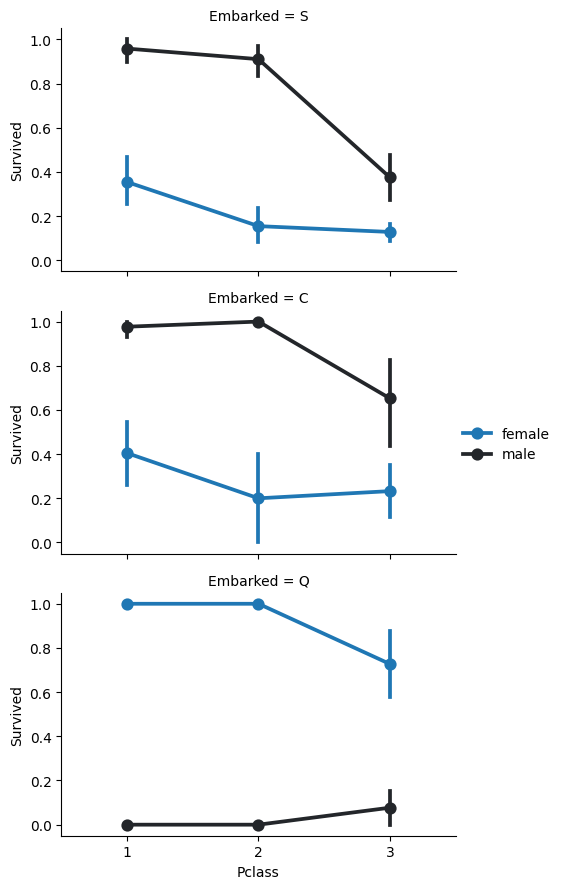

In [7]:
# lets look for any correlation between embarked and survival chance 
FacetGrid = sns.FacetGrid(data, row='Embarked', aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Gender', palette='dark:#1f77b4',  order=None, hue_order=None )
FacetGrid.add_legend()

# Women on port Q have a higher chance of survival but women on ports S and C have low chances of survival
# Men have a high survival probability if they are on port C and S, but a low probability if they are on port Q.

<Axes: xlabel='Pclass', ylabel='Survived'>

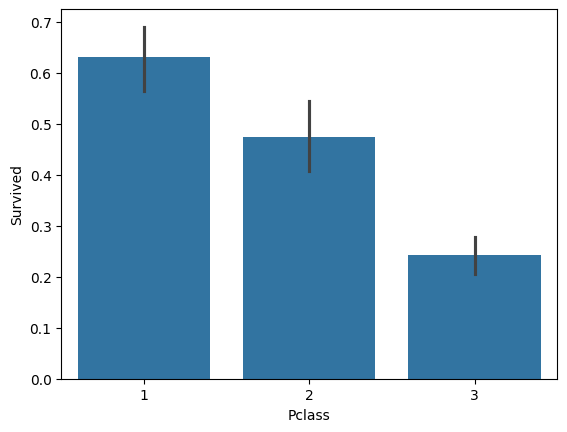

In [8]:
# pclass have a negative correlation with survived so we look into it a bit deeper 
sns.barplot(x='Pclass', y='Survived', data=data)

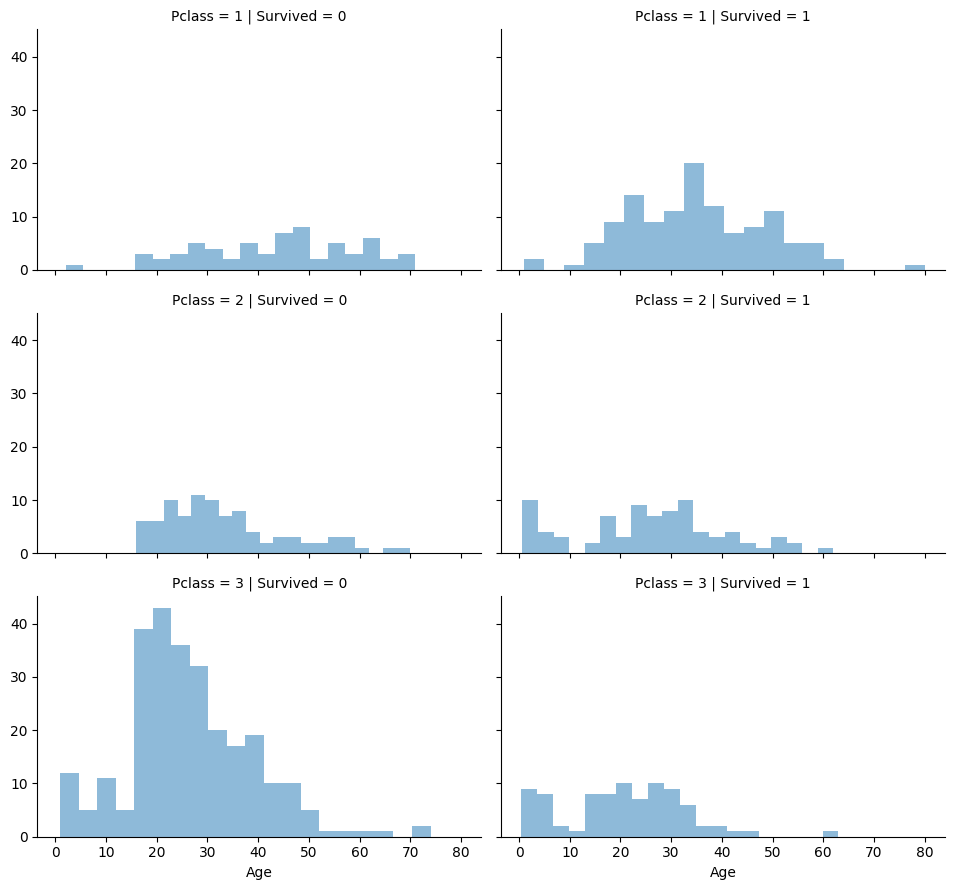

In [9]:
# pclass = 1 implies the person is more likely to survive and other pclasses people in a localised age clusters survived 
grid = sns.FacetGrid(data, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

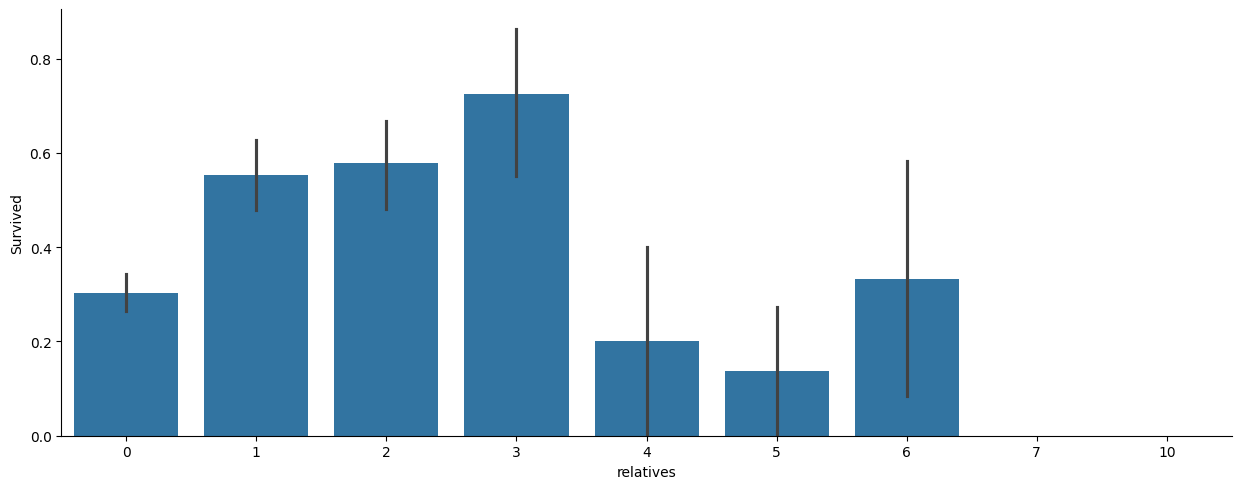

In [10]:
# we combine sibsp and parch to create a feature called relatives
data['relatives'] = data['SibSp'] + data['Parch']
data.loc[data['relatives'] > 0, 'not_alone'] = 0
data.loc[data['relatives'] == 0, 'not_alone'] = 1
data['not_alone'] = data['not_alone'].astype(int)
data['not_alone'].value_counts()
axes = sns.catplot(data=data, x='relatives',y='Survived', aspect = 2.5,kind='bar')

In [11]:
# As 'cabin' has a lot of null values we drop the column
data = data.drop(columns=['Cabin'])

data

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1


In [12]:
# lets fill up the nan values in age with near realitic values 
mean = data["Age"].mean()
std = data["Age"].std()
is_null = data["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
data["Age"] = age_slice
data["Age"] = data["Age"].astype(int)

data["Age"].isnull().sum()

np.int64(0)

In [13]:
# with only 2 missing values we can fill embarked with most common value
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [14]:
data['Embarked'] = data['Embarked'].fillna('S')
# all the null values are handled now 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  relatives    891 non-null    int64  
 12  not_alone    891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


In [15]:
# mapping gender to numerical values
data['Gender'] = data['Gender'].map({'male': 0, 'female': 1})  # Convert categorical to numerical
print(data['Gender'])

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Gender, Length: 891, dtype: int64


In [16]:
data['Age'] = data['Age'].astype(int)
data.loc[ data['Age'] <= 11, 'Age'] = 0
data.loc[(data['Age'] > 11) & (data['Age'] <= 18), 'Age'] = 1
data.loc[(data['Age'] > 18) & (data['Age'] <= 22), 'Age'] = 2
data.loc[(data['Age'] > 22) & (data['Age'] <= 27), 'Age'] = 3
data.loc[(data['Age'] > 27) & (data['Age'] <= 33), 'Age'] = 4
data.loc[(data['Age'] > 33) & (data['Age'] <= 40), 'Age'] = 5
data.loc[(data['Age'] > 40) & (data['Age'] <= 66), 'Age'] = 6
data.loc[ data['Age'] > 66, 'Age'] = 6

# its a nice distribution 
data['Age'].value_counts()

Age
6    163
4    163
5    154
3    131
2    110
1    102
0     68
Name: count, dtype: int64

In [17]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
# extract titles
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                        'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')
# convert titles into numbers
data['Title'] = data['Title'].map(titles)
# filling NaN with 0, to get safe
data['Title'] = data['Title'].fillna(0)

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipykernel_12725/2659866726.py:3: SyntaxWarning: invalid escape sequence '\.'
  data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [18]:
# data = data.drop(columns = ['Ticket','PassengerId','Name','SibSp','Parch'])
data = data.drop(columns = ['Ticket','PassengerId','Name'])

In [19]:
ohe_data = pd.get_dummies(data,columns=['Pclass','Embarked'],drop_first=True)
ohe_data

,Survived,Gender,Age,SibSp,Parch,Fare,relatives,not_alone,Title,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,0,2,1,0,7.2500,1,0,1,False,True,False,True
1,1,1,5,1,0,71.2833,1,0,3,False,False,False,False
2,1,1,3,0,0,7.9250,0,1,2,False,True,False,True
3,1,1,5,1,0,53.1000,1,0,3,False,False,False,True
4,0,0,5,0,0,8.0500,0,1,1,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,3,0,0,13.0000,0,1,5,True,False,False,True
887,1,1,2,0,0,30.0000,0,1,2,False,False,False,True
888,0,1,5,1,2,23.4500,3,0,2,False,True,False,True
889,1,0,3,0,0,30.0000,0,1,1,False,False,False,False


<Axes: >

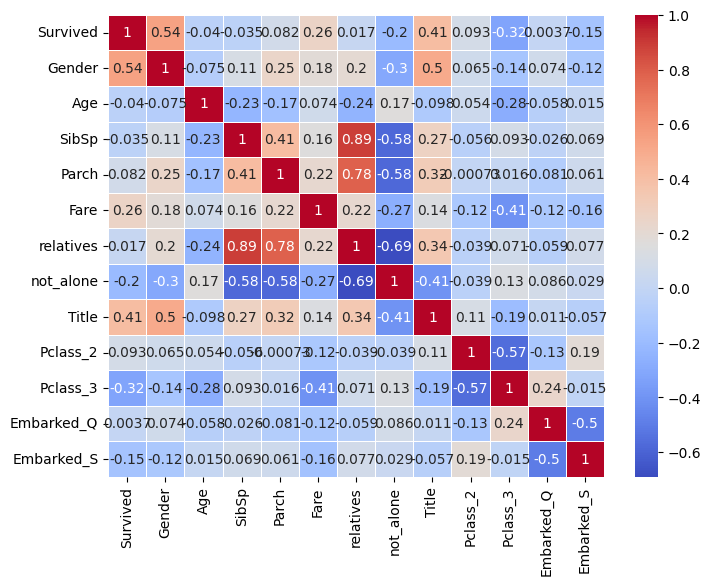

In [20]:
corr_mat =  ohe_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_mat,annot=True,cmap="coolwarm",linewidths=.5)

In [21]:
# Split into features and target
X = ohe_data.drop(columns=['Survived'], axis=1)
y = ohe_data['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Initialize RandomForestClassifier with default parameters
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print("Default Random Forest Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Default Random Forest Classifier Performance:
Accuracy: 0.8022388059701493
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       157
           1       0.78      0.73      0.75       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
n_estimators= [5,10 ,25 , 50, 100, 200]
max_depth= [None, 5, 10, 15,25,50]
min_samples_split= [2, 5, 10,20,50]

accuracy = []


for estimator in n_estimators:
    for maxdepth in max_depth:
        for split in min_samples_split:
            rfc = RandomForestClassifier(n_estimators=estimator,max_depth=maxdepth,min_samples_split=split,random_state=42)
            rfc.fit(X_train, y_train)

            # Make predictions
            y_pred = rfc.predict(X_test)

            # Evaluate the model
            acc = accuracy_score(y_test, y_pred)
            if estimator==10 and maxdepth == 50:
                accuracy.append(acc)
                print(accuracy)

[0.7985074626865671]
[0.7985074626865671, 0.8097014925373134]
[0.7985074626865671, 0.8097014925373134, 0.8171641791044776]
[0.7985074626865671, 0.8097014925373134, 0.8171641791044776, 0.8059701492537313]
[0.7985074626865671, 0.8097014925373134, 0.8171641791044776, 0.8059701492537313, 0.8283582089552238]


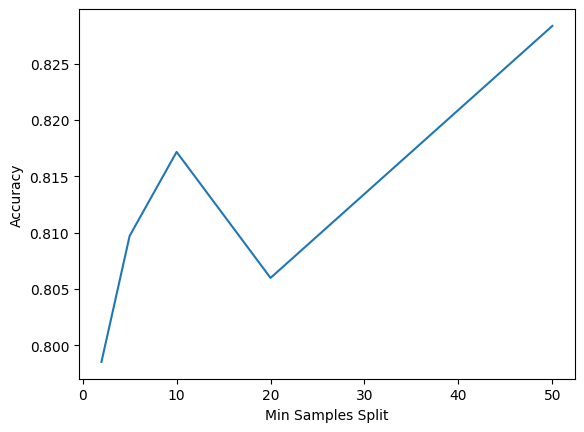

In [24]:
plt.plot(min_samples_split,accuracy)
plt.xlabel('Min Samples Split')
plt.ylabel('Accuracy')
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       157
           1       0.76      0.73      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



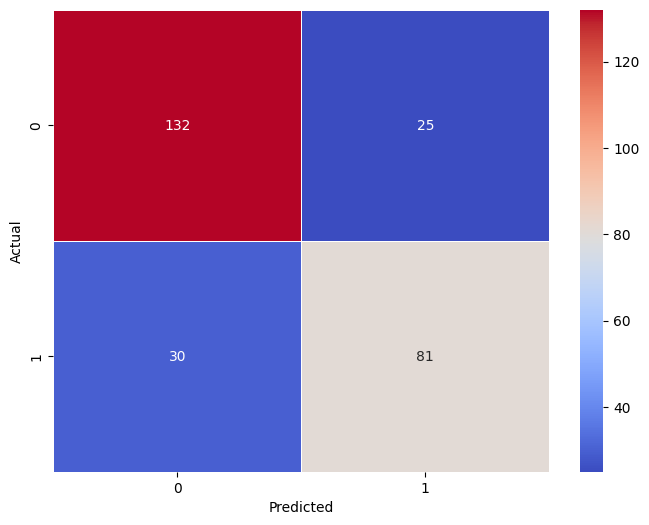

In [25]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(matrix,annot=True,fmt='.0f',cmap="coolwarm",linewidths=.5)
plt.ylabel('Actual')
plt.xlabel("Predicted")
print(classification_report(y_test, y_pred))

In [26]:
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rfc.feature_importances_
}).sort_values(by='importance', ascending=False)

In [27]:
feature_importances

,feature,importance
4,Fare,0.292234
7,Title,0.177967
0,Gender,0.160458
1,Age,0.115014
9,Pclass_3,0.063903
5,relatives,0.059084
2,SibSp,0.032334
11,Embarked_S,0.029068
3,Parch,0.025860
8,Pclass_2,0.020386


Default Decision Tree Classifier Performance:
Accuracy: 0.7574626865671642
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       157
           1       0.72      0.68      0.70       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



Text(0.5, 36.72222222222221, 'Predicted')

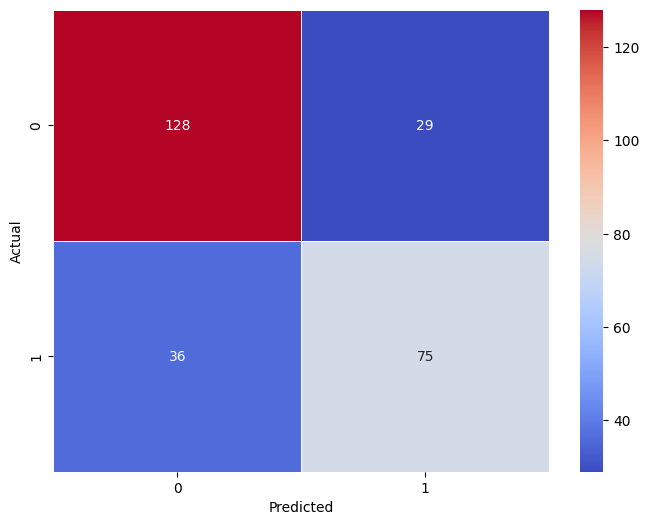

In [28]:
# Initialize DecisionTree with default parameters
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Make predictions
y_pred = dtree.predict(X_test)

# Evaluate the model
print("Default Decision Tree Classifier Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(matrix,annot=True,fmt='.0f',cmap="coolwarm",linewidths=.5)
plt.ylabel('Actual')
plt.xlabel("Predicted")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       157
           1       0.78      0.74      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



Text(0.5, 36.72222222222221, 'Predicted')

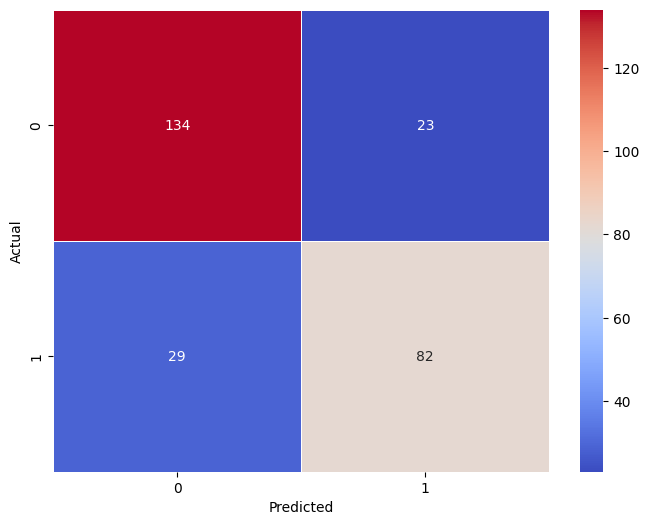

In [29]:
# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split
    'max_depth': [None, 2, 4, 6, 8, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6],  # Minimum number of samples required to be at a leaf node
    'max_features': [None, 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model
best_dtree = grid_search.best_estimator_
y_pred = best_dtree.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(matrix,annot=True,fmt='.0f',cmap="coolwarm",linewidths=.5)
plt.ylabel('Actual')
plt.xlabel("Predicted")

In [30]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))


solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
max_iters = [10,50,100,150,200,250,300,500]

for solver in solvers:
    for max_iter in max_iters:
        model = LogisticRegression(solver=solver,max_iter=max_iter)
        model.fit(X_train,y_train)
        
        y_pred = model.predict(X_test)

        print(f"solver = {solver}  ------- iter = {max_iter}")
        print(classification_report(y_pred=y_pred,y_true=y_test))

Logistic Regression Accuracy: 0.8022388059701493

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       157
           1       0.77      0.75      0.76       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.80      0.80      0.80       268

solver = lbfgs  ------- iter = 10
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       157
           1       0.80      0.29      0.42       111

    accuracy                           0.68       268
   macro avg       0.73      0.62      0.60       268
weighted avg       0.71      0.68      0.63       268

solver = lbfgs  ------- iter = 50
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       157
           1       0.77      0.75      0.76       111

    accuracy                           0.

/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

solver = newton-cholesky  ------- iter = 200
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       157
           1       0.77      0.75      0.76       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.80      0.80      0.80       268

solver = newton-cholesky  ------- iter = 250
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       157
           1       0.77      0.75      0.76       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.80      0.80      0.80       268

solver = newton-cholesky  ------- iter = 300
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       157
           1       0.77      0.75      0.76       111

    accuracy                           0.80    

/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-pack

solver = saga  ------- iter = 250
              precision    recall  f1-score   support

           0       0.68      0.93      0.78       157
           1       0.79      0.37      0.50       111

    accuracy                           0.70       268
   macro avg       0.73      0.65      0.64       268
weighted avg       0.72      0.70      0.67       268

solver = saga  ------- iter = 300
              precision    recall  f1-score   support

           0       0.68      0.93      0.78       157
           1       0.79      0.38      0.51       111

    accuracy                           0.70       268
   macro avg       0.74      0.65      0.65       268
weighted avg       0.73      0.70      0.67       268

solver = saga  ------- iter = 500
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       157
           1       0.83      0.48      0.61       111

    accuracy                           0.74       268
   macro avg       0.77   

/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],      # Algorithms to use for optimization
    'penalty': ['l1', 'l2', 'elasticnet'], # Regularization type
    'max_iter': [100, 200, 300]            # Maximum number of iterations
}


# Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_log_model = grid_search.best_estimator_
y_pred = best_log_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-pack

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       157
           1       0.79      0.75      0.77       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.81       268
weighted avg       0.81      0.81      0.81       268

Accuracy: 0.8134328358208955


/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/veegee/venvs/pt_env/lib/python3.12/site-pack

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy_before_tuning = accuracy_score(y_test, y_pred)
print("Accuracy before tuning:", accuracy_before_tuning)
print("\nClassification Report (Before Tuning):")
print(classification_report(y_test, y_pred))

Accuracy before tuning: 0.7574626865671642

Classification Report (Before Tuning):
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       157
           1       0.74      0.64      0.69       111

    accuracy                           0.76       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.76      0.76      0.75       268



In [33]:
# Define the hyperparameter grid for KNN
param_grid = {
    'n_neighbors': list(range(1, 21)),  # Test n_neighbors from 1 to 20
    'weights': ['uniform', 'distance']    # Test uniform vs distance weights
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'n_neighbors': 11, 'weights': 'uniform'}


In [34]:
# Evaluate the best model
best_knn = grid_search.best_estimator_
y_pred_tuned = best_knn.predict(X_test)

# Print accuracy and classification report after tuning
accuracy_after_tuning = accuracy_score(y_test, y_pred_tuned)
print("Accuracy after tuning:", accuracy_after_tuning)
print("\nClassification Report (After Tuning):")
print(classification_report(y_test, y_pred_tuned))

Accuracy after tuning: 0.7761194029850746

Classification Report (After Tuning):
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       157
           1       0.74      0.70      0.72       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.77      0.78      0.78       268

